# <strong><font color='red'>Ética en la Toma de Decisiones Basada en Datos</font></strong>

Analizar cómo los sesgos en los datos y modelos pueden afectar la toma de decisiones automatizadas, identificando sus causas, impactos y mecanismos de mitigación desde una perspectiva ética.


**Librerías**
<br> Antes de comenzar a explorar nuestros datos, es importante importar las bibliotecas que nos permitirán manipularlos y visualizarlos.

In [1]:
# Importar librerías 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


sns.set_context("paper")  # Tamaño de fuente más profesional
sns.set_style("whitegrid")  # Fondo blanco con rejilla sutil

# Oculta TODOS los warnings
warnings.filterwarnings("ignore")

## **1. Definición de Sesgo**

Un **sesgo** se refiere a una distorsión sistemática en la recolección, análisis, interpretación o modelado de datos. Puede ser introducido en varias etapas del ciclo de vida del dato y del modelo. Algunos tipos de sesgo son:


### **1.1. Muestreo (Sampling Bias)**         
Este sesgo suele originarse en la forma en que se seleccionan o recolectan los datos, excluyendo sistemáticamente a ciertos grupos o sobrerrepresentando a otros.

> Ejemplo: Un modelo predictivo entrenado únicamente con datos de adultos urbanos puede fallar al aplicarse en adolescentes o en poblaciones rurales, ya que sus patrones de comportamiento y contexto son distintos.

<img src="Local\imgs\sampling_bias.png" alt="Muestreo (Sampling Bias)" width="700">

### **1.2. Medición (Measurement Bias)** 
Ocurre cuando los datos recopilados no reflejan con precisión la realidad que pretenden representar. Este tipo de sesgo puede deberse a errores en los instrumentos de medición, inconsistencias en el proceso de recolección de datos o definiciones ambiguas de las variables.
> En medicina, si un dispositivo mide sistemáticamente la presión arterial más baja de lo que realmente es, todos los pacientes podrían ser subestimados en su riesgo cardiovascular, afectando decisiones clínicas basadas en esos datos.

<img src="Local\imgs\measurement_bias.jpg" alt="Measurement Bias" width="1000">

Imagen tomada de: https://www.cut-the-saas.com/learn-prompting-ai-bias

### **1.3. Selección (Selection Bias)**  
El sesgo de selección surge cuando los datos incluidos en el análisis no son elegidos de forma aleatoria o imparcial, lo que afecta la validez de las conclusiones. Este sesgo puede producirse al excluir ciertos registros, usar criterios de inclusión no representativos, o cuando los datos disponibles están condicionados por decisiones previas.

> Ejemplo: Evaluar la eficacia de un tratamiento médico solo con pacientes que completaron el tratamiento, ignorando a quienes lo abandonaron, puede sobreestimar su efectividad real.

<img src="Local\imgs\selection_bias.jpg" alt="Selection Bias" width="400">

Imagen tomada de: https://www.sciencedirect.com/topics/medicine-and-dentistry/selection-bias

### **1.4. Algorítmico (Algorithmic Bias)**
El sesgo algorítmico se produce cuando un modelo predictivo aprende y reproduce desigualdades o patrones injustos presentes en los datos de entrenamiento, en el diseño del algoritmo o en las decisiones de modelado. Aún cuando los datos parezcan neutrales, los algoritmos pueden amplificar sesgos sociales, históricos o institucionales.

> Ejemplo: Un sistema de recomendación de empleo que históricamente ha priorizado candidatos hombres para roles técnicos puede seguir haciéndolo, incluso si las mujeres tienen perfiles equivalentes, perpetuando la discriminación de género.

<img src="Local\imgs\algorithm_bias.jpg" alt="Algorithmic Bias - 2" width="800">

Tomado de:https://rjionline.org/news/understand-algorithmic-bias-in-journalism/

<img src="Local\imgs\algorithm_bias.png" alt="Algorithmic Bias" width="800">

Tomado de: https://alumni.berkeley.edu/california-magazine/online/biased-algorithms-exacerbate-racial-inequality-health-care/




### **1.5. Por retroalimentación (Feedback Loop)**
El sesgo por retroalimentación ocurre cuando las predicciones de un modelo influyen directamente en los datos futuros que alimentan al mismo modelo, creando un ciclo que refuerza patrones iniciales, aunque estos sean incorrectos o injustos. Este fenómeno puede hacer que ciertos errores o desigualdades se acumulen y se intensifiquen con el tiempo.

> Ejemplo: Un modelo policial que predice mayor criminalidad en ciertas zonas puede llevar a asignar más patrullas allí. Esto genera más reportes y arrestos en esa área, reforzando la creencia de que hay más criminalidad, aunque no se esté midiendo objetivamente.

<img src="Local\imgs\feedback-loops-bias.png" alt="Feedback Loop" width="800">

Tomado de: https://www.microsoft.com/en-us/research/blog/when-bias-begets-bias-a-source-of-negative-feedback-loops-in-ai-systems/


### **Resumen de tipos de sesgo:**

| Tipo de sesgo                          | Definición breve                                                                                              | Ejemplo sencillo                                                                                     | Fuente académica                                                                          |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Muestreo (Sampling Bias)**           | Los datos no representan adecuadamente a toda la población objetivo                                           | Modelo entrenado solo con adultos aplicado a adolescentes                                             | Barocas, S., Hardt, M., & Narayanan, A. (2019). *Fairness and Machine Learning*                       |
| **Medición (Measurement Bias)**        | Errores sistemáticos en cómo se registran los datos                                                           | Sensor de temperatura mal calibrado que marca fiebre sin que la haya                                  | Suresh, H., & Guttag, J. V. (2019). *A Framework for Understanding Unintended Consequences of ML*     |
| **Selección (Selection Bias)**         | Se genera al elegir qué datos incluir o excluir del análisis                                                  | Estudio de productividad sin incluir trabajadores remotos                                             | Olteanu, A., Castillo, C., Diaz, F., & Kıcıman, E. (2019). *Social Data: Biases, Methodologies, Ethics* |
| **Algorítmico (Algorithmic Bias)**     | Decisiones del modelo que refuerzan desigualdades históricas                                                  | Usar historial de arrestos como indicador fuerte de “riesgo”                                          | Angwin, J., Larson, J., Mattu, S., & Kirchner, L. (2016). *ProPublica - Machine Bias*                 |
| **Por retroalimentación (Feedback Loop)** | El modelo influye en datos futuros, perpetuando errores                                                       | Patrullas asignadas a zonas de “alto riesgo” generan más arrestos, reforzando el sesgo                | Lepri, B., Oliver, N., Letouzé, E., Pentland, A. & Vinck, P. (2017). *Fair, Transparent, and Accountable AI* |


## **2. ¿Cómo detectar sesgos?** 

Detectar sesgos es un paso esencial para garantizar decisiones automatizadas justas, transparentes y socialmente responsables. A continuación se presentan métodos clave para identificar sesgos en sistemas algorítmicos:

### **2.1. Exploración inicial de los datos**
- Analiza distribuciones por atributos sensibles como **género**, **raza/etnia**, **edad**, **nivel socioeconómico**, etc.
- Revisa valores ausentes, codificaciones problemáticas y posibles correlaciones con variables de salida.
- Visualizaciones recomendadas:
  - Histogramas comparativos
  - Gráficos de barras segmentados
  - Boxplots por grupo

### **2.2. Comparación de métricas por subgrupos**
- Evalúa el rendimiento del modelo (precisión, recall, F1-score, AUC) por cada grupo demográfico.
- Identifica disparidades significativas en errores (falsos positivos/negativos) entre subpoblaciones.
- Aplica métricas de equidad como:
  - Equal Opportunity
  - Demographic Parity
  - Predictive Equality

### **2.3. Uso de herramientas de auditoría algorítmica**

Estas herramientas permiten auditar, visualizar y mitigar sesgos en sistemas automatizados:

| Herramienta                               | Enlace                                                                                      | Características Principales                                                                                  | Compatible con...                          |
|-------------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| **Fairness Indicators (Google)**          | [🔗 Repositorio GitHub](https://github.com/tensorflow/fairness-indicators)                             | Métricas visuales para modelos de clasificación y comparación entre subgrupos.                              | TensorFlow                                 |
| **Aequitas**                               | [🔗 Repositorio GitHub](https://github.com/dssg/aequitas)                                               | Auditoría ética, con reportes claros sobre disparidades por atributos sensibles.                            | Python, modelos personalizados             |
| **AI Fairness 360 (IBM)**                 | [🔗 Repositorio GitHub](https://github.com/Trusted-AI/AIF360)                                           | Métricas + algoritmos para mitigar sesgos antes, durante y después del modelado.                            | Python, scikit-learn, TensorFlow           |
| **What-If Tool**                          | [🔗 Página Web](https://pair-code.github.io/what-if-tool/)                                         | Interfaz visual para modificar datos y analizar impacto en las predicciones sin escribir código.            | TensorFlow SavedModel, Cloud AI Platform   |
| **Fairlearn**                             | [🔗 Repositorio GitHub](https://github.com/fairlearn/fairlearn)                                         | Técnicas de mitigación + gráficos para análisis de equidad y disparidad en modelos.                         | scikit-learn, Jupyter Notebooks            |
| **EthicalML**                             | [🔗 Repositorio GitHub](https://github.com/EthicalML)                                                   | Repositorio colaborativo enfocado en transparencia y responsabilidad algorítmica.                           | Multiplataforma, abierta y flexible        |


## **3. Estrategias de mitigación** 

A continuación se realiza un resumen enfoques clave de mitigación de sesgos en IA, organizados por etapa del pipeline, con herramientas, referencias y descripciones concisas.

| Nivel       | Estrategia                          | Objetivo de la estrategia                                         | Herramientas / Ejemplos                             | Referencias clave                                 |
|---------------|----------------------------------------|--------------------------------------------------------|--------------------------------------------------------|-----------------------------------------------------|
| **Datos**     | - Balanceo de clases<br>- Muestreo estratificado<br>- Anonimización sensible<br>- Data augmentation | Ajusta la representación de grupos y protege privacidad antes del entrenamiento. | - SMOTE<br>- StratifiedKFold (sklearn)<br>- `diffprivlib` (IBM) | - Barocas et al. (2019)<br>- Dwork & Ilvento (2018) |
| **Modelo**    | - Reweighting por grupo<br>- Regularización de equidad<br>- Fairness-aware learning | Modifica el entrenamiento para penalizar disparidades y promover la equidad algorítmica. | - Fairlearn<br>- AIF360<br>- `GroupFairnessModel` (custom) | - Hardt et al. (2016)<br>- Zafar et al. (2017)     |
| **Post-hoc**  | - Corrección por grupo<br>- Revisión humana<br>- Interpretabilidad y auditoría | Revisa y ajusta predicciones tras el modelo, promoviendo transparencia y supervisión. | - SHAP / LIME<br>- FairVis<br>- `What-If Tool` (Google) | - Doshi-Velez & Kim (2017)<br>- Binns (2020)       |




**Preguntas claves**

- ¿Es posible eliminar completamente el sesgo en sistemas basados en datos?
- ¿Cuáles son las responsabilidades del científico de datos frente al sesgo?
- ¿Quién debe rendir cuentas por decisiones automatizadas?




## **4. Casos emblemáticos**

### **4.1. COMPAS (Correctional Offender Management Profiling for Alternative Sanction):** 

COMPAS es un algoritmo utilizado en EE. UU. para evaluar el riesgo de reincidencia de personas acusadas de delitos. Se emplea en decisiones judiciales como libertad condicional, sentencias y asignación de programas de rehabilitación.

> Cargar datos del caso **COMPAS**. Puedes obtener los datos desde [ProPublica GitHub](https://github.com/propublica/compas-analysis).

En el contexto del análisis del algoritmo COMPAS, la expresión `df['is_recid'] == 0` se refiere a aquellas personas que **no reincidieron** en delitos dentro de los dos años posteriores a su evaluación. Es decir:

- `is_recid = 0` ➝ **No cometió otro delito** (no reincidente).
- `is_recid = 1` ➝ **Sí cometió otro delito** (reincidente).

💡 Este dato es crucial para evaluar si el modelo acertó o se equivocó en su predicción. Por ejemplo:

- Si el modelo predijo **alto riesgo** pero `is_recid` es 0, entonces fue un **falso positivo**.
- Si predijo **bajo riesgo** y `is_recid` es 1, entonces fue un **falso negativo**.


<img src="Local\imgs\compas.png" alt="Compas" width="1000">

Tomada de: https://medium.com/@danaytaman/algorithmic-bias-in-data-and-machine-learning-models-cc3ac681b440

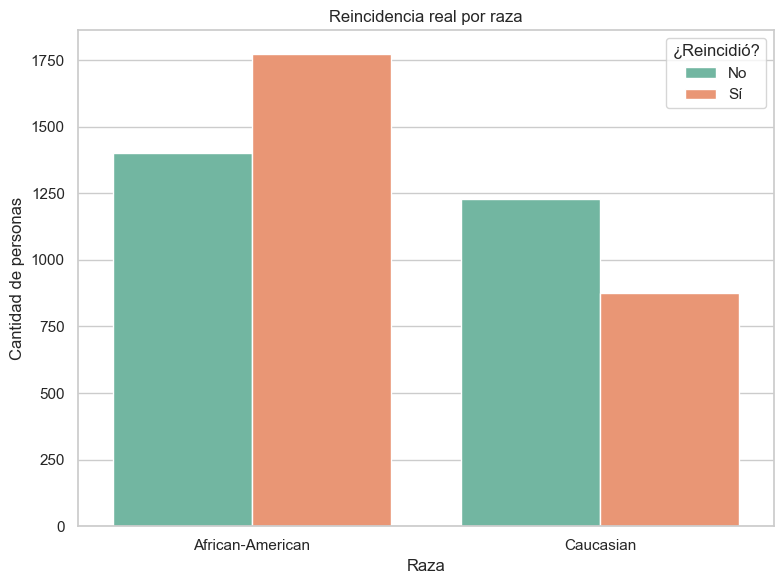

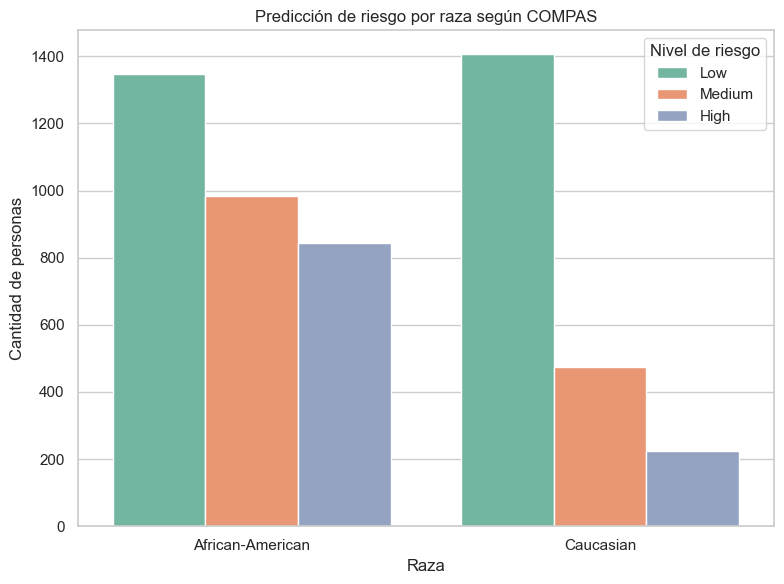

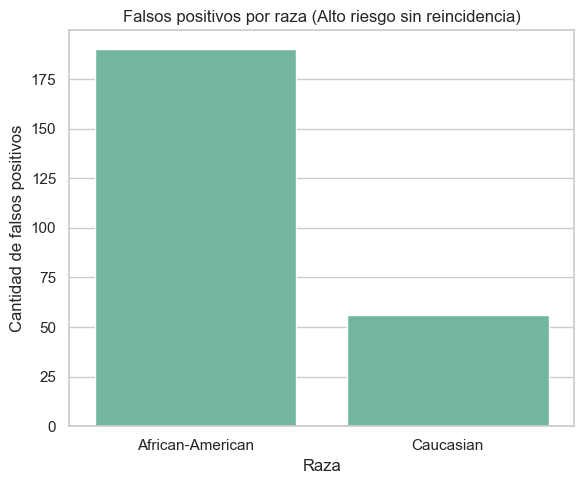

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid", palette="Set2")

# Cargar datos
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df = pd.read_csv(url)

# Filtrar casos válidos
df = df[(df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30)]
df = df[df['is_recid'] != -1]
df = df[df['race'].isin(['African-American', 'Caucasian'])]
df = df[df['score_text'].isin(['Low', 'Medium', 'High'])]

# Gráfico 1: Reincidencia real por raza
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='race', hue='is_recid')
plt.title('Reincidencia real por raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad de personas')
plt.legend(title='¿Reincidió?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

# Gráfico 2: Predicción de riesgo por raza
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='race', hue='score_text', order=['African-American', 'Caucasian'])
plt.title('Predicción de riesgo por raza según COMPAS')
plt.xlabel('Raza')
plt.ylabel('Cantidad de personas')
plt.legend(title='Nivel de riesgo')
plt.tight_layout()
plt.show()

# Gráfico 3: Falsos positivos por raza
df['false_positive'] = ((df['score_text'] == 'High') & (df['is_recid'] == 0)).astype(int)
fp_counts = df[df['false_positive'] == 1]['race'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=fp_counts.index, y=fp_counts.values)
plt.title('Falsos positivos por raza (Alto riesgo sin reincidencia)')
plt.xlabel('Raza')
plt.ylabel('Cantidad de falsos positivos')
plt.tight_layout()
plt.show()


El número de falsos positivos para personas afroamericanas es más de tres veces mayor que para personas blancas.

#### **Resultados de las gráficas:**
- **Predicción desigual de riesgo:** COMPAS predice “alto riesgo” más frecuentemente en personas afroamericanas.
- **Falsos positivos desproporcionados:** El número de personas afroamericanas clasificadas como “alto riesgo” que NO reinciden (falsos positivos) es mucho mayor. Esto significa que el modelo castiga de forma preventiva a cierto grupo sin evidencia suficiente.
- **Reincidencia real similar:** Aunque la reincidencia real no muestra diferencias tan drásticas entre grupos, COMPAS trata de forma desigual al predecir.

⚠️ ¿Cuál fue el problema de sesgo?
En 2016, la organización ProPublica publicó una investigación que reveló que COMPAS era más propenso a clasificar erróneamente a personas afroamericanas como de “alto riesgo” de reincidencia, incluso cuando no reincidían.

> Ejemplo: el 45% de los afroamericanos que no reincidieron fueron etiquetados como de alto riesgo, frente al 23% de los blancos en la misma situación.

⚠️ ¿Por qué ocurre esto?
- El algoritmo se entrena con datos históricos del sistema judicial, que ya contienen sesgos raciales estructurales.
- Variables como historial de arrestos, entorno social o nivel educativo pueden estar correlacionadas con raza debido a desigualdades sistémicas, lo que perpetúa la discriminación.

⚠️ ¿Qué respondió la empresa creadora?
- Northpointe, la empresa detrás de COMPAS, argumentó que el análisis de ProPublica usó una métrica de equidad distinta a la suya.
- Según ellos, el sistema era “equitable” en términos de precisión general, pero el debate mostró cómo la definición de equidad puede variar según el enfoque estadístico.

⚖️ Implicaciones éticas y legales
- Este caso puso en evidencia que los algoritmos pueden reforzar prejuicios existentes si no se diseñan ni auditan cuidadosamente.
- También abrió el debate sobre la transparencia algorítmica, ya que COMPAS es un sistema cerrado y no se conoce su lógica interna

### **4.2. Algoritmo de salud de Optum (Estados Unidos)**
Un algoritmo utilizado por aseguradoras para asignar recursos a pacientes priorizaba a quienes habían tenido mayores gastos médicos en el pasado, asumiendo que eso reflejaba mayor necesidad clínica.

> Pacientes afroamericanos, que históricamente tienen menos acceso al sistema de salud, eran subestimados en riesgo clínico porque sus gastos eran menores, no por estar más sanos.

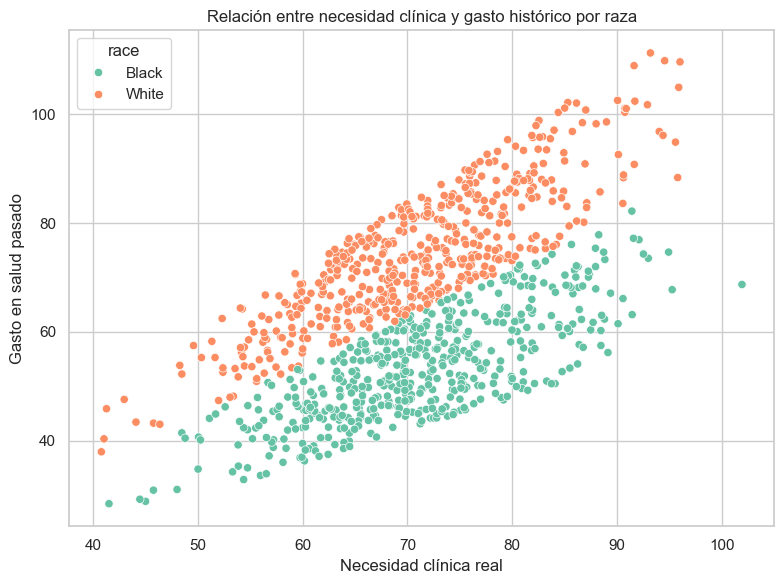

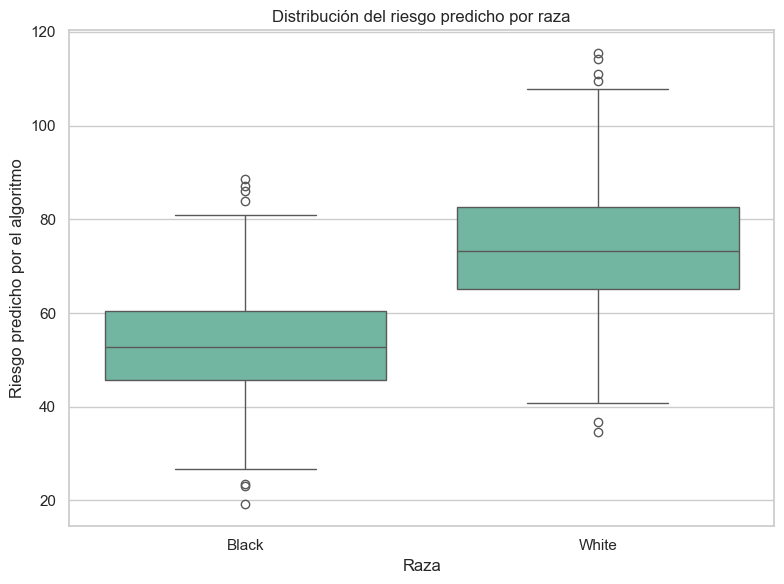

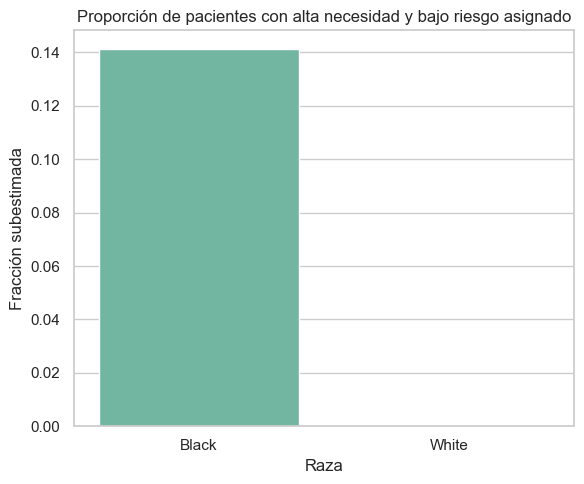

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid", palette="Set2")

# Generar datos simulados
np.random.seed(42)
n = 1000

# Simular datos
df = pd.DataFrame({
    'race': np.random.choice(['Black', 'White'], size=n, p=[0.5, 0.5]),
    'actual_need': np.random.normal(loc=70, scale=10, size=n),  # necesidad clínica real
})

# Simular gasto en salud condicionado por raza
df['historical_spend'] = df.apply(
    lambda row: row['actual_need'] * np.random.uniform(0.6, 0.9) if row['race'] == 'Black'
                else row['actual_need'] * np.random.uniform(0.9, 1.2),
    axis=1
)

# Algoritmo de riesgo basado solo en gasto
df['predicted_risk'] = df['historical_spend'] + np.random.normal(0, 5, size=n)

# Clasificación en niveles de prioridad
df['risk_level'] = pd.cut(df['predicted_risk'],
                          bins=[0, 60, 80, 100],
                          labels=['Bajo', 'Medio', 'Alto'])

# ───────────────────────── Visualizaciones ───────────────────────── #

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='actual_need', y='historical_spend', hue='race')
plt.title('Relación entre necesidad clínica y gasto histórico por raza')
plt.xlabel('Necesidad clínica real')
plt.ylabel('Gasto en salud pasado')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='race', y='predicted_risk')
plt.title('Distribución del riesgo predicho por raza')
plt.xlabel('Raza')
plt.ylabel('Riesgo predicho por el algoritmo')
plt.tight_layout()
plt.show()

df['underprioritized'] = ((df['actual_need'] > 75) & (df['predicted_risk'] < 60)).astype(int)
prior_counts = df.groupby('race')['underprioritized'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(data=prior_counts, x='race', y='underprioritized')
plt.title('Proporción de pacientes con alta necesidad y bajo riesgo asignado')
plt.xlabel('Raza')
plt.ylabel('Fracción subestimada')
plt.tight_layout()
plt.show()


### **4.3. Calificación automatizada de ensayos (Estados Unidos)**
Sistemas como e-rater (ETS) y otros motores de puntuación automatizada se utilizan en pruebas estandarizadas como el GRE y evaluaciones estatales. Estos modelos se entrenan con miles de ensayos previamente calificados por humanos, buscando patrones que correlacionen con puntuaciones altas o bajas.

> Los algoritmos tienden a penalizar estilos lingüísticos no convencionales, como dialectos regionales, expresiones culturales o estructuras narrativas creativas. Esto afecta especialmente a estudiantes de minorías lingüísticas o con inglés como segundo idioma.

Una investigación de Motherboard reveló que algunos sistemas pueden ser engañados por ensayos sin sentido pero con vocabulario sofisticado, mientras que textos con ideas profundas pero lenguaje informal reciben puntuaciones bajas. Además, estudios como el de Amorim et al. (NAACL 2018) muestran que el sesgo de los evaluadores humanos se transfiere al modelo, amplificando prejuicios.

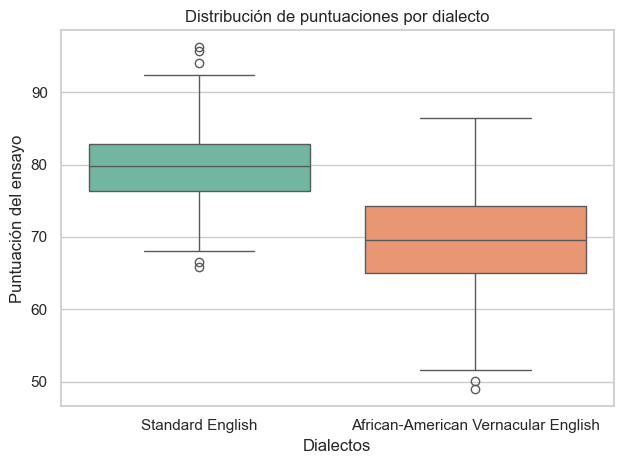

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos simulados
df = pd.DataFrame({
    'dialect': ['Standard English']*500 + ['African-American Vernacular English']*500,
    'essay_score': list(np.random.normal(80, 5, 500)) + list(np.random.normal(70, 7, 500))
})

sns.boxplot(data=df, x='dialect', y='essay_score', palette='Set2')
plt.title('Distribución de puntuaciones por dialecto')
plt.xlabel('Dialectos')
plt.ylabel('Puntuación del ensayo')
plt.tight_layout()
plt.show()


## **5. Transparencia y explicabilidad en modelos predictivos**

La transparencia y explicabilidad en modelos predictivos son pilares fundamentales para garantizar la confianza, la auditoría y la equidad en sistemas de inteligencia artificial, especialmente en contextos sensibles como salud, justicia o recursos humanos. La explicabilidad permite comprender **cómo** y **por qué** un modelo toma ciertas decisiones, lo que facilita su evaluación por parte de expertos, reguladores y usuarios afectados. 

<br> Lo anterior puede lograrse mediante el uso de modelos intrínsecamente interpretables —como árboles de decisión o regresión lineal— o mediante técnicas post-hoc aplicadas a modelos complejos, como SHAP o LIME. Además, la documentación sistemática del proceso de desarrollo (ej. Model Cards), la evaluación de equidad entre subgrupos poblacionales y la visualización de la importancia de variables contribuyen a una gobernanza más ética y transparente de los sistemas algorítmicos. Así, la explicabilidad no sólo es una cuestión técnica, sino también un imperativo social y normativo.

### **5.1. ¿Cómo implementarlo?**
Implementar transparencia y explicabilidad en modelos predictivos implica adoptar prácticas y herramientas que permitan:
1. Comprender cómo y por qué el modelo toma una decisión.
2. Comunicar esta información de forma clara a usuarios técnicos y no técnicos.
3. Asegurar que las decisiones automáticas sean auditables, éticas y confiables.

#### **5.1.1. Elegir modelos más interpretables cuando sea posible**
- Modelos intrínsecamente interpretables: Regresión lineal, árboles de decisión, regresión logística, etc.
- Evitar cajas negras (como redes neuronales profundas) en contextos donde la trazabilidad es crítica (salud, justicia, finanzas).

#### **5.1.2. Usar técnicas de explicabilidad post-hoc**
Para modelos complejos como Random Forest, XGBoost o Redes Neuronales:

<br>🔹 SHAP (SHapley Additive exPlanations)
- Mide la contribución de cada variable a una predicción específica.
- Compatible con casi todos los modelos.
- Proporciona explicaciones locales y globales.

<br>🔹 LIME (Local Interpretable Model-agnostic Explanations)
- Crea un modelo interpretable local alrededor de una predicción específica.
- Muestra cómo influyen las variables en cada decisión individual.

#### **5.1.3.  Visualizaciones de importancia de variables**
- Barras, mapas de calor o gráficos SHAP resumen.
- Ayudan a entender qué variables tienen mayor impacto general en el modelo.

#### **5.1.4.  Documentación y trazabilidad**
- Explicar las decisiones del modelo en lenguaje natural.
- Incluir detalles de:
  - Fuentes de datos
  - Transformaciones
  - Métricas de desempeño
  - Riesgos éticos y de sesgo

#### **5.1.5. Interfaces explicativas**
Dashboards para usuarios no técnicos que muestren predicciones y razones. Ejemplo, “La probabilidad de reingreso es del 78% porque el paciente tuvo 3 visitas previas y presenta comorbilidades”.

#### **5.1.6. Validación con expertos del dominio**
- Validar que las explicaciones sean comprensibles y relevantes para los usuarios finales (médicos, docentes, abogados, etc.).
- Realizar sesiones de validación ética o comités de revisión si aplica.

### **Resumen**
En la siguiente tabla se presenta un resumen de las estrategias que van en pro de lograr más transparencia y explicabilidad en los modelos predictivos: 

| Técnica                           | Descripción                                                                 | Herramienta recomendada     |
|----------------------------------|-----------------------------------------------------------------------------|-----------------------------|
| **Modelos interpretables**       | Usar algoritmos simples y comprensibles (ej. árboles, regresión lineal).   | scikit-learn                |
| **Interpretación post-hoc**      | Explicar modelos complejos mediante técnicas auxiliares.                   | LIME, SHAP                  |
| **Importancia de variables**     | Visualizar qué variables influyen en las predicciones.                     | SHAP values, Permutation Importance |
| **Documentación de decisiones**  | Registrar decisiones sobre algoritmos, datos y métricas.                   | Model Cards, Datasheets     |
| **Evaluación de equidad**        | Identificar y mitigar discriminación hacia grupos protegidos.              | Fairlearn, Aequitas         |

## **6. Aspectos éticos y normativos**

### **6.1. Normatividad**

El avance en el uso de datos y algoritmos ha motivado a diferentes países a desarrollar regulaciones robustas. A continuación, se listan algunas normativas destacadas fuera de Europa y América Latina:

| Norma                             | País / Región        | Características clave                                                                 |
|----------------------------------|----------------------|----------------------------------------------------------------------------------------|
| **GDPR (General Data Protection Regulation)** | Unión Europea        | Referente global. Establece principios estrictos sobre consentimiento y derechos del usuario. |
| **CCPA (California Consumer Privacy Act)**                 | California, EE.UU.   | Amplía el control de los consumidores sobre sus datos; exige transparencia comercial. |
| **PIPEDA**                        | Canadá               | Regula la recopilación, uso y divulgación de datos personales en el sector privado.  |
| **PDPA**                          | Singapur             | Balance entre protección de datos y facilitación de negocios digitales.              |
| **Data Protection Act 2018**      | Reino Unido          | Adapta el GDPR al contexto británico post-Brexit.                                    |
| **Lei Geral de Proteção de Dados (LGPD)** | Brasil    | Similar al GDPR; establece principios y derechos amplios sobre datos personales.     |
| **Protection of Personal Information Act (POPIA)** | Sudáfrica | Refuerza el consentimiento, la seguridad de la información y el derecho al olvido.   |
| **APPI (Act on the Protection of Personal Information)** | Japón | Promueve la transferencia internacional de datos bajo estándares adecuados.          |
| **Ley Federal de Protección de Datos Personales en Posesión de los Particulares** | México | Regula el tratamiento de datos personales en el sector privado; incluye derechos ARCO. |
| **Ley 1581 de 2012 y Decreto 1377 de 2013** | Colombia | Reconoce el habeas data como derecho fundamental. Establece principios, derechos y obligaciones sobre el tratamiento de datos. Superintendencia de Industria y Comercio es la autoridad de control. |
| **Ley N.º 19.628 sobre Protección de la Vida Privada** *(reformada por la Ley 21.459)* | Chile | Define datos personales y sensibles. Requiere consentimiento expreso. En 2022 se incorporó la figura de la Agencia de Protección de Datos Personales. |





**📌 Observaciones clave**

- **Canadá (PIPEDA)**: En proceso de transición hacia una ley más estricta: **Bill C-27**, que propone una nueva Ley de Protección de Datos de Consumo.
- **Japón (APPI)**: Permite transferencia internacional de datos solo a países con normativas adecuadas o bajo acuerdos contractuales específicos.
- **Sudáfrica (POPIA)**: Una de las leyes más influyentes del continente africano; se aplica a ciudadanos y empresas extranjeras que traten datos de sudafricanos.
- **Singapur (PDPA)**: Integra normas de protección con enfoque de “soft law”, fomentando la innovación mediante principios generales más flexibles.
- **México**: Reconoce expresamente los derechos ARCO (Acceso, Rectificación, Cancelación y Oposición), y promueve la autorregulación vinculante.

### **6.2. Principios éticos transversales**
Estos marcos se sustentan en principios comunes que deben guiar el uso ético y responsable de los datos:

- **Consentimiento informado**: Toda recolección de datos debe estar respaldada por el consentimiento libre y explícito del titular.
- **Transparencia y trazabilidad**: El sujeto debe saber qué datos se recopilan, para qué, cómo se usan y por cuánto tiempo.
- **Minimización y proporcionalidad**: Solo deben recolectarse los datos estrictamente necesarios para cumplir con el propósito declarado.
- **Limitación de finalidad**: Los datos no pueden utilizarse con fines diferentes a los autorizados.
- **Seguridad y confidencialidad**: Protección frente a accesos no autorizados, pérdida o alteración indebida de la información.
- **No discriminación y justicia algorítmica**: Los sistemas predictivos no deben reforzar sesgos o exclusiones sociales.

### **6.3. Buenas prácticas para el cumplimiento ético-normativo**
- Aplicar el principio de **"Privacy by Design"** desde la etapa de diseño del proyecto.
- Incorporar **evaluaciones de impacto** sobre privacidad (DPIA).
- Mantener documentación y trazabilidad del flujo de datos.
- Usar técnicas como la **seudonimización**, **diferential privacy** y **control de acceso granular**.
- Crear mecanismos de **auditoría ética** y **comités de revisión** multidisciplinarios.
- Brindar a los usuarios herramientas de **control** y **consulta** sobre sus datos.

## **Bibliografía**

- Amorim, E., Cançado, M., & Veloso, A. (2018). Automated Essay Scoring in the Presence of Biased Ratings. En: Proceedings of NAACL-HLT 2018.  
- Barocas, S., Hardt, M., & Narayanan, A. (2019). *Fairness and Machine Learning*.  
- Danks, D., & London, A. J. (2017). Algorithmic bias in autonomous systems. *IJCAI*, 4691–4697.  
- Doshi-Velez, F., & Kim, B. (2017). Towards A Rigorous Science of Interpretable Machine Learning. 
- Mittelstadt, B. D., Allo, P., Taddeo, M., Wachter, S., & Floridi, L. (2016). *The ethics of algorithms: Mapping the debate*. _Big Data & Society_, 3(2). [https://doi.org/10.1177/2053951716679679](https://doi.org/10.1177/2053951716679679)
- Litman, D., Zhang, H., Correnti, R., Matsumura, L. C., & Wang, E. (2021). A Fairness Evaluation of Automated Methods for Scoring Text Evidence Usage in Writing. En: Artificial Intelligence in Education (AIED 2021), Lecture Notes in Computer Science, vol. 12748
- Lundberg, S. M., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. NeurIPS. SHAP Paper
- Obermeyer, Z., et al. (2019). Dissecting racial bias in an algorithm used to manage the health of populations. *Science*, 366(6464), 447–453.
- Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). "Why Should I Trust You?": Explaining the Predictions of Any Classifier. KDD. DOI:10.1145/2939672.2939778
- Suresh, H., & Guttag, J. V. (2019). A Framework for Understanding Unintended Consequences of Machine Learning. Communications of the ACM.
- Ley 1581 de 2012. (Colombia). *Por la cual se dictan disposiciones generales para la protección de datos personales*. Superintendencia de Industria y Comercio.  
  [https://www.sic.gov.co/proteccion-de-datos-personales](https://www.sic.gov.co/proteccion-de-datos-personales)
- Biblioteca del Congreso Nacional de Chile. (2020). *Ley sobre protección de la vida privada*.  
  [https://www.bcn.cl/leychile/navegar?idNorma=141599](https://www.bcn.cl/leychile/navegar?idNorma=141599)
- Wachter, S., Mittelstadt, B., & Floridi, L. (2017). *Why a right to explanation of automated decision-making does not exist in the General Data Protection Regulation*. _International Data Privacy Law_, 7(2), 76–99.  
  [https://doi.org/10.1093/idpl/ipx005](https://doi.org/10.1093/idpl/ipx005)
- Floridi, L., & Taddeo, M. (2016). *What is data ethics?*. _Philosophical Transactions of the Royal Society A_, 374(2083).  
  [https://doi.org/10.1098/rsta.2016.0360](https://doi.org/10.1098/rsta.2016.0360)






